# <center> Titanic Data 

# Exploratory Data Analysis

In [1]:
import pandas as pd
df = pd.read_csv("Titanic_Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
## Overview of data sample
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
## To identify if there are any missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
## Statistical summary for numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
## A pandas module to understand data better

# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

## Error due to pandas version hence unable to execute it

<AxesSubplot: >

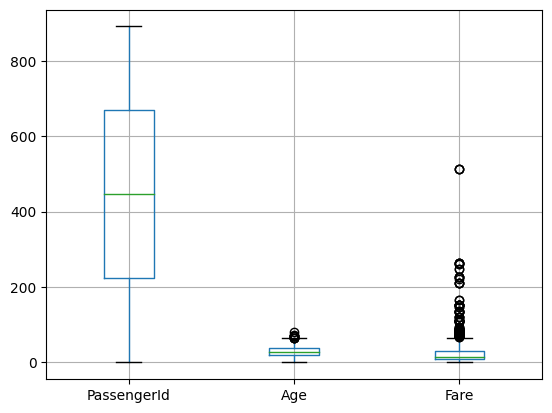

In [6]:
## To check if there are any columns with outlier
## Converting category columns to dtype category since its into object or int

df_boxplot = df.copy()
df_boxplot[['Survived','Pclass','Sex','SibSp','Parch','Cabin','Embarked']] = df_boxplot[['Survived','Pclass','Sex','SibSp','Parch','Cabin','Embarked']].astype('category')

df_boxplot.boxplot()

### Inference : 
1. Missing value needs to be handled for columns - Age, Cabin, Embarked
2. Outliers needs to be handled for columns - Age, Fare 

# Handling Missing Values

## Method : Statistical Imputation

In [7]:
df['Age'] = df['Age'].fillna(value=df['Age'].mean())
df['Age'] = df['Age'].astype('int')

print("\nCheck if there are any missing values now\n",df.isnull().sum())


Check if there are any missing values now
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
from sklearn.impute import SimpleImputer
import numpy as np

## strategy : default=’mean’, options : "most_frequent" ,"median", "constant"

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

df['Age'] = imp_mean.fit_transform(df[['Age']]).ravel()

print("\nCheck if there are any missing values now\n",df.isnull().sum())


Check if there are any missing values now
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Method : k-Nearest Neighbor (KNN) Imputation 

In [9]:
### Embarked had just 2 missing values, we can assign them with highest seen category as a simple fix, 
### using KNN imputation for demonstration purpose

### Can be done for individual columns and then append to the dataframe else can be performed on entire dataset

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

df = pd.read_csv("Titanic_Dataset.csv")
del df['Name']

# Label Encoding : Encoding is the process of converting text or boolean values to numerical values for processing.
df = df.apply(lambda series: pd.Series(LabelEncoder().fit_transform(series[series.notnull()]),
                                       index=series[series.notnull()].index))

print("\nBefore KNN Imputing: \n",df.head())

imputer = KNNImputer(n_neighbors=3)

df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("\nAfter KNN Imputing: \n",df_imputed.head())

print("\nCheck if there are any missing values now\n",df_imputed.isnull().sum())


Before KNN Imputing: 
    PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Ticket  Fare  \
0            0         0       2    1  28.0      1      0     523    18   
1            1         1       0    0  51.0      1      0     596   207   
2            2         1       2    0  34.0      0      0     669    41   
3            3         1       0    0  47.0      1      0      49   189   
4            4         0       2    1  47.0      0      0     472    43   

   Cabin  Embarked  
0    NaN       2.0  
1   81.0       0.0  
2    NaN       2.0  
3   55.0       2.0  
4    NaN       2.0  

After KNN Imputing: 
    PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Ticket   Fare  \
0          0.0       0.0     2.0  1.0  28.0    1.0    0.0   523.0   18.0   
1          1.0       1.0     0.0  0.0  51.0    1.0    0.0   596.0  207.0   
2          2.0       1.0     2.0  0.0  34.0    0.0    0.0   669.0   41.0   
3          3.0       1.0     0.0  0.0  47.0    1.0    0.0    49.0  189.0

## Method : Iterative Imputation

In [10]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np

df = pd.read_csv("Titanic_Dataset.csv")

categorical = ['Sex','Cabin','Embarked']
numerical = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']

df[categorical] = df[categorical].apply(lambda series: pd.Series(LabelEncoder().fit_transform(series[series.notnull()]),
                                                                 index=series[series.notnull()].index))

# To impute numerical columns
imp_num = IterativeImputer(estimator=RandomForestRegressor(),
                           initial_strategy='mean',
                           max_iter=10, random_state=0)

# To impute categorical columns
imp_cat = IterativeImputer(estimator=RandomForestClassifier(), 
                           initial_strategy='most_frequent',
                           max_iter=10, random_state=0)

print("\nBefore Iterative Imputing: \n",df.head())

df[numerical] = imp_num.fit_transform(df[numerical])
df[categorical] = imp_cat.fit_transform(df[categorical])

print("\nAfter Iterative Imputing: \n",df_imputed.head())

print("\nCheck if there are any missing values now\n",df_imputed.isnull().sum())


Before Iterative Imputing: 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Cabin  Embarked  
0         A/5 21171   7.2500    NaN       2.0  
1          PC 17599  71.2833   81.0       0.0  
2  STON/O2. 3101282   7.9250    NaN       2.0  
3            113803  53.1000   55.0       2.0  
4            373450   8.05

C:\Users\SRK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(



After Iterative Imputing: 
    PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Ticket   Fare  \
0          0.0       0.0     2.0  1.0  28.0    1.0    0.0   523.0   18.0   
1          1.0       1.0     0.0  0.0  51.0    1.0    0.0   596.0  207.0   
2          2.0       1.0     2.0  0.0  34.0    0.0    0.0   669.0   41.0   
3          3.0       1.0     0.0  0.0  47.0    1.0    0.0    49.0  189.0   
4          4.0       0.0     2.0  1.0  47.0    0.0    0.0   472.0   43.0   

        Cabin  Embarked  
0  142.333333       2.0  
1   81.000000       0.0  
2   99.666667       2.0  
3   55.000000       2.0  
4  142.333333       2.0  

Check if there are any missing values now
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\SRK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [11]:
df.to_csv("Titanic_Dataset_Imputed.csv",index = False)

# Handling Outliers

## Method : Standard Deviation

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv("Titanic_Dataset_Imputed.csv")

## Converting Age to int since age cant be float value
df['Age'] = df['Age'].astype('int')

## Calculating Mean and Standard Deviation
mean_age = np.mean(df['Age'])
sd_age = np.std(df['Age'])

print("\nMean of Age:\n",mean_age,"\nStandard Deviation of Age:\n",sd_age)

lower_limit = mean_age-3*sd_age
upper_limit = mean_age+3*sd_age

print("\n Lower Limit:\n",lower_limit)
print("\n Upper Limit:\n",upper_limit)

print("\nOutlier Detected:\n",df[(df['Age']<=lower_limit) | (df['Age']>=upper_limit)])

# Removing Outliers
df = df[(df['Age']<=lower_limit) | (df['Age']>=upper_limit)]


Mean of Age:
 29.500561167227833 
Standard Deviation of Age:
 13.715841141762198

 Lower Limit:
 -11.64696225805876

 Upper Limit:
 70.64808459251442

Outlier Detected:
      PassengerId  Survived  Pclass                                  Name  Sex  \
96          97.0       0.0     1.0             Goldschmidt, Mr. George B  1.0   
493        494.0       0.0     1.0               Artagaveytia, Mr. Ramon  1.0   
630        631.0       1.0     1.0  Barkworth, Mr. Algernon Henry Wilson  1.0   
851        852.0       0.0     3.0                   Svensson, Mr. Johan  1.0   

     Age  SibSp  Parch    Ticket     Fare  Cabin  Embarked  
96    71    0.0    0.0  PC 17754  34.6542   12.0       0.0  
493   71    0.0    0.0  PC 17609  49.5042   25.0       0.0  
630   80    0.0    0.0     27042  30.0000    5.0       2.0  
851   74    0.0    0.0    347060   7.7750  141.0       2.0  


## Method : Z Score

In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv("Titanic_Dataset_Imputed.csv")

## Converting Age to int since age cant be float value
df['Age'] = df['Age'].astype('int')

## Calculating Mean and Standard Deviation
mean_age = np.mean(df['Age'])
sd_age = np.std(df['Age'])

print("\nMean of Age:\n",mean_age,"\nStandard Deviation of Age:\n",sd_age)

df['Age_ZScore'] = df['Age'].apply(lambda x: (x-mean_age)/sd_age)

print("\nOutlier Detected:\n",df[df['Age_ZScore']>3])

## Removing Outliers
df = df[df['Age_ZScore']<3]


Mean of Age:
 29.500561167227833 
Standard Deviation of Age:
 13.715841141762198

Outlier Detected:
      PassengerId  Survived  Pclass                                  Name  Sex  \
96          97.0       0.0     1.0             Goldschmidt, Mr. George B  1.0   
493        494.0       0.0     1.0               Artagaveytia, Mr. Ramon  1.0   
630        631.0       1.0     1.0  Barkworth, Mr. Algernon Henry Wilson  1.0   
851        852.0       0.0     3.0                   Svensson, Mr. Johan  1.0   

     Age  SibSp  Parch    Ticket     Fare  Cabin  Embarked  Age_ZScore  
96    71    0.0    0.0  PC 17754  34.6542   12.0       0.0    3.025658  
493   71    0.0    0.0  PC 17609  49.5042   25.0       0.0    3.025658  
630   80    0.0    0.0     27042  30.0000    5.0       2.0    3.681833  
851   74    0.0    0.0    347060   7.7750  141.0       2.0    3.244383  


## Method : Interquartile Range 

In [14]:
import pandas as pd
import numpy as np

df = pd.read_csv("Titanic_Dataset_Imputed.csv")

## Converting Age to int since age cant be float value
df['Age'] = df['Age'].astype('int')

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR_Value = Q3-Q1

lower_limit = Q1-1.5*IQR_Value
upper_limit = Q3+1.5*IQR_Value

print("\n Lower Limit:\n",lower_limit)
print("\n Upper Limit:\n",upper_limit)

print("\nOutlier Detected:\n",df[(df['Age']<=lower_limit) | (df['Age']>=upper_limit)])

## Removing Outliers
df = df[(df['Age']<=lower_limit) | (df['Age']>=upper_limit)]


 Lower Limit:
 -3.0

 Upper Limit:
 61.0

Outlier Detected:
      PassengerId  Survived  Pclass                                       Name  \
33          34.0       0.0     2.0                      Wheadon, Mr. Edward H   
54          55.0       0.0     1.0             Ostby, Mr. Engelhart Cornelius   
96          97.0       0.0     1.0                  Goldschmidt, Mr. George B   
116        117.0       0.0     3.0                       Connors, Mr. Patrick   
170        171.0       0.0     1.0                  Van der hoef, Mr. Wyckoff   
252        253.0       0.0     1.0                  Stead, Mr. William Thomas   
275        276.0       1.0     1.0          Andrews, Miss. Kornelia Theodosia   
280        281.0       0.0     3.0                           Duane, Mr. Frank   
326        327.0       0.0     3.0                  Nysveen, Mr. Johan Hansen   
438        439.0       0.0     1.0                          Fortune, Mr. Mark   
456        457.0       0.0     1.0             

## Method : Automatic Outlier Detection

### IsolationForest

In [15]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np

df = pd.read_csv("Titanic_Dataset_Imputed.csv")

df['Fare_Outlier'] = IsolationForest(random_state=123).fit_predict(df['Fare'].values.reshape(-1,1))

print(df['Fare_Outlier'].value_counts().sort_values(ascending=False))

## Removing Outliers
df = df[df['Fare_Outlier']==1]

 1    729
-1    162
Name: Fare_Outlier, dtype: int64


In [16]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np

df = pd.read_csv("Titanic_Dataset_Imputed.csv")

df['Age_Outlier'] = IsolationForest(random_state=123).fit_predict(df['Age'].values.reshape(-1,1))

print(df['Age_Outlier'].value_counts().sort_values(ascending=False))

## Removing Outliers
df = df[df['Age_Outlier']==1]

 1    582
-1    309
Name: Age_Outlier, dtype: int64


### LocalOutlierFactor

In [17]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd

df = pd.read_csv("Titanic_Dataset_Imputed.csv")

df['Fare_Outlier'] = LocalOutlierFactor().fit_predict(df['Fare'].values.reshape(-1,1))

print(df['Fare_Outlier'].value_counts().sort_values(ascending=False))

## Removing Outliers
df = df[df['Fare_Outlier']==1]

 1    726
-1    165
Name: Fare_Outlier, dtype: int64


In [18]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd

df = pd.read_csv("Titanic_Dataset_Imputed.csv")

df['Age_Outlier'] = LocalOutlierFactor().fit_predict(df['Age'].values.reshape(-1,1))

print(df['Age_Outlier'].value_counts().sort_values(ascending=False))

## Removing Outliers
df = df[df['Age_Outlier']==1]

 1    752
-1    139
Name: Age_Outlier, dtype: int64


# Feature Selection / Feature Engineering

## Chi-Squared Statistic

In [19]:
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Titanic_Dataset_Imputed.csv")

independet_var = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
target_var = df['Survived']

scores = chi2(independet_var,target_var)

f_score = pd.Series(scores[0],index=independet_var.columns)
p_values = pd.Series(scores[1],index=independet_var.columns)

print("Best features selected are:\n", list(p_values[p_values <0.05].index))

Best features selected are:
 ['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Cabin', 'Embarked']


   Features        Score Selected
0    Pclass    30.873699     True
1       Sex    92.702447     True
2       Age    31.093736     True
3     SibSp     2.581865    False
4     Parch    10.097499     True
5      Fare  4518.319091     True
6     Cabin   512.105148     True
7  Embarked    10.202525     True


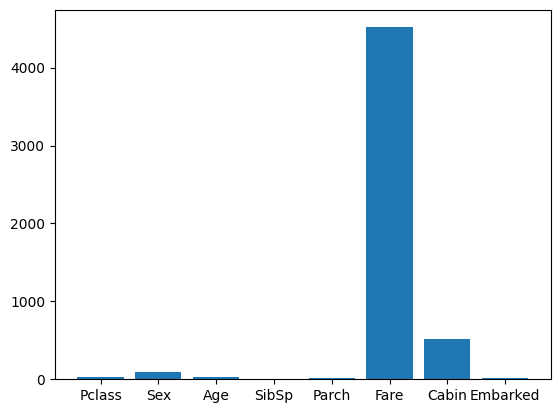

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
import pandas as pd

df = pd.read_csv("Titanic_Dataset_Imputed.csv")

independet_var = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
target_var = df['Survived']

## K defines number of features
best_feature_chi = SelectKBest(chi2, k=7)

Kbest_Feature = best_feature_chi.fit_transform(independet_var, target_var)

features = independet_var.columns

chi_df = pd.DataFrame()
chi_df['Features'] = independet_var.columns
chi_df['Score'] = best_feature_chi.scores_
chi_df['Selected'] = chi_df['Features'].apply(lambda x: 'True' if x in list(features[best_feature_chi.get_support()]) else 'False')
print(chi_df)

pyplot.bar(chi_df['Features'],chi_df['Score'])
pyplot.show()

## Feature Importance

                Features      Score Selected
0          fixed acidity   0.024991     True
1       volatile acidity  -1.083590     True
2            citric acid  -0.182564     True
3         residual sugar   0.016331     True
4              chlorides  -1.874225     True
5    free sulfur dioxide   0.004361     True
6   total sulfur dioxide  -0.003265     True
7                density -17.881164     True
8                     pH  -0.413653     True
9              sulphates   0.916334     True
10               alcohol   0.276198     True


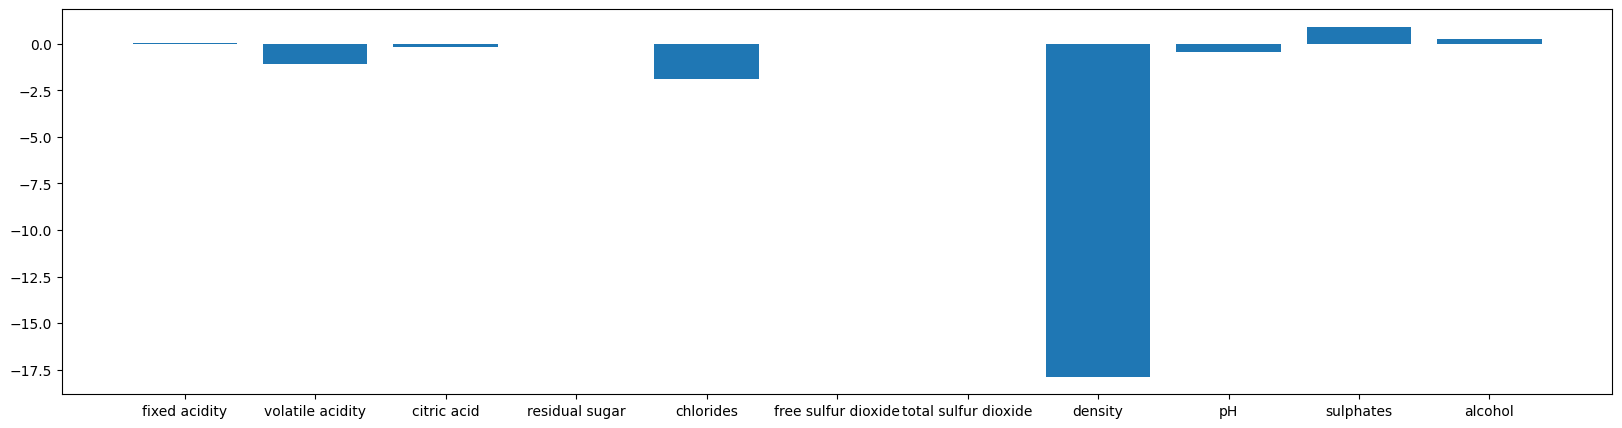

In [21]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import pandas as pd

df = pd.read_csv("winequality-red.csv")

model = LinearRegression()

independet_var = df.iloc[:,:-1]
target_var = df.iloc[:,-1:]

model.fit(independet_var,target_var)
model.coef_

LR_df = pd.DataFrame()
LR_df['Features'] = independet_var.columns
LR_df['Score'] = ((model.coef_).reshape(11,1))
LR_df['Selected'] = np.where(LR_df['Score']==0.000,'False','True')
print(LR_df)

plt.figure(figsize=(20, 5))
pyplot.bar(LR_df['Features'],LR_df['Score'])
pyplot.show()

   Features     Score Selected
0    Pclass  0.113598     True
1       Sex  0.300459     True
2       Age  0.240717     True
3     SibSp  0.054048     True
4     Parch  0.022876     True
5      Fare  0.213246     True
6     Cabin  0.045706     True
7  Embarked  0.009350     True


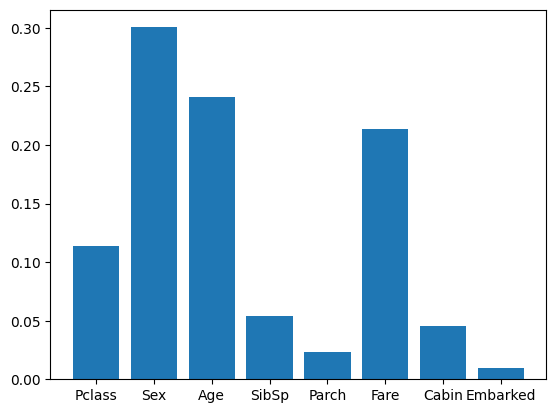

In [22]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
import pandas as pd

df = pd.read_csv("Titanic_Dataset_Imputed.csv")

independet_var = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
target_var = df['Survived']

model = DecisionTreeClassifier()

model.fit(independet_var,target_var)

tree_df = pd.DataFrame()
tree_df['Features'] = independet_var.columns
tree_df['Score'] = model.feature_importances_
tree_df['Selected'] = np.where(tree_df['Score']==0.000,'False','True')
print(tree_df)

pyplot.bar(tree_df['Features'],tree_df['Score'])
pyplot.show()

## Recursive Feature Elimination (RFE)

In [23]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
import pandas as pd

df = pd.read_csv("Titanic_Dataset_Imputed.csv")

independet_var = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
target_var = df['Survived']

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe.fit(independet_var,target_var)

rfe_df = pd.DataFrame()
rfe_df['Features'] = independet_var.columns
rfe_df['Ranking'] = rfe.ranking_
rfe_df['Selected'] = rfe.support_

print(rfe_df)

   Features  Ranking  Selected
0    Pclass        1      True
1       Sex        1      True
2       Age        1      True
3     SibSp        2     False
4     Parch        3     False
5      Fare        1      True
6     Cabin        1      True
7  Embarked        4     False
